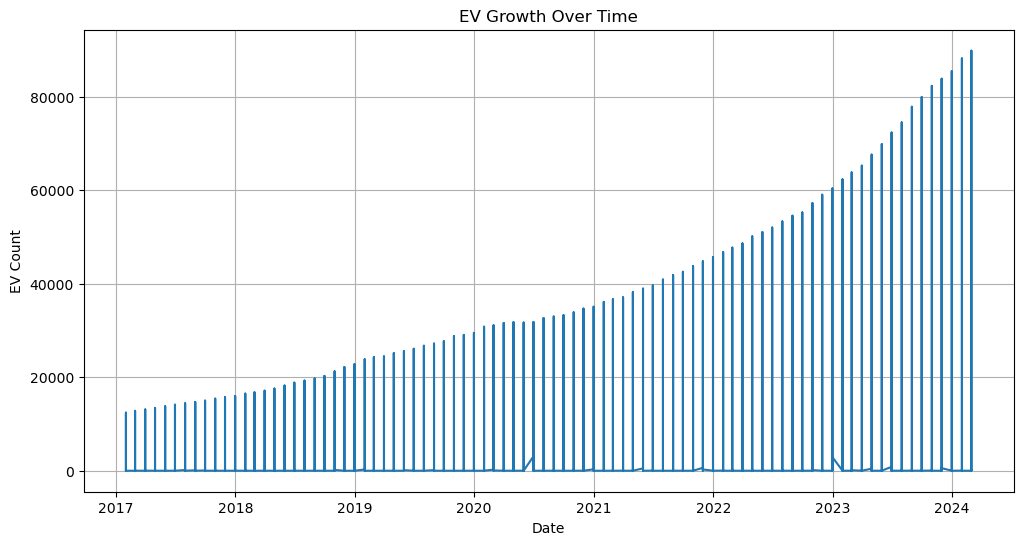

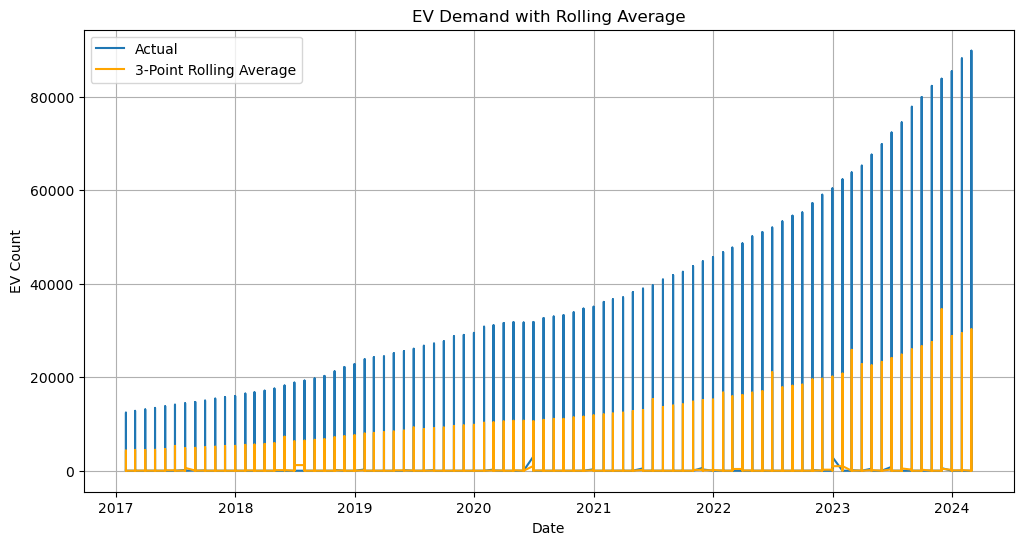

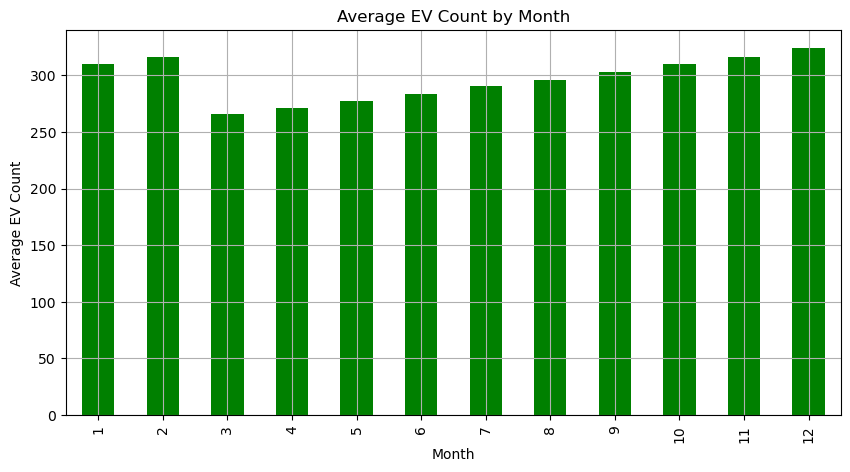

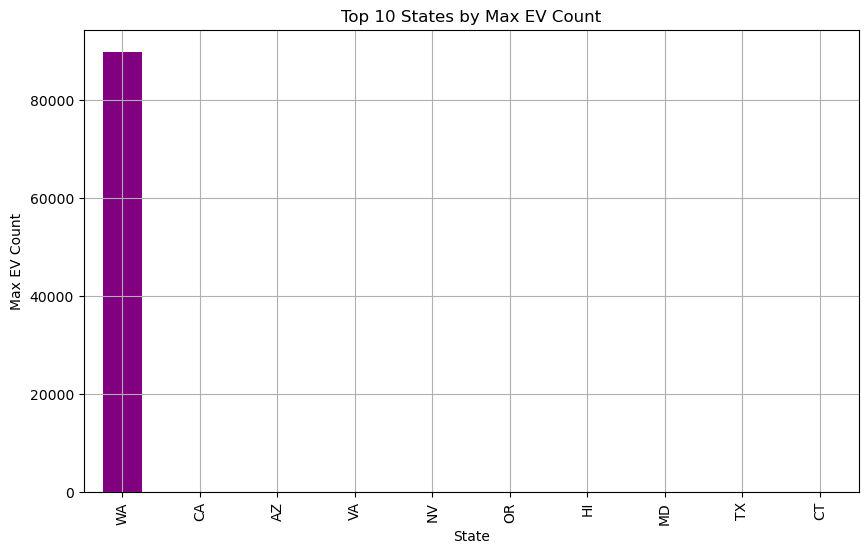

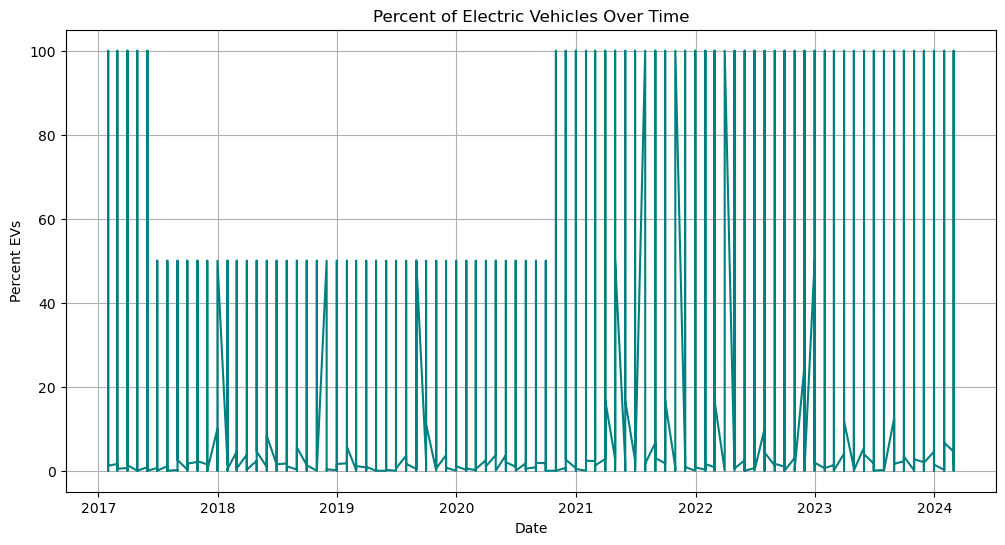

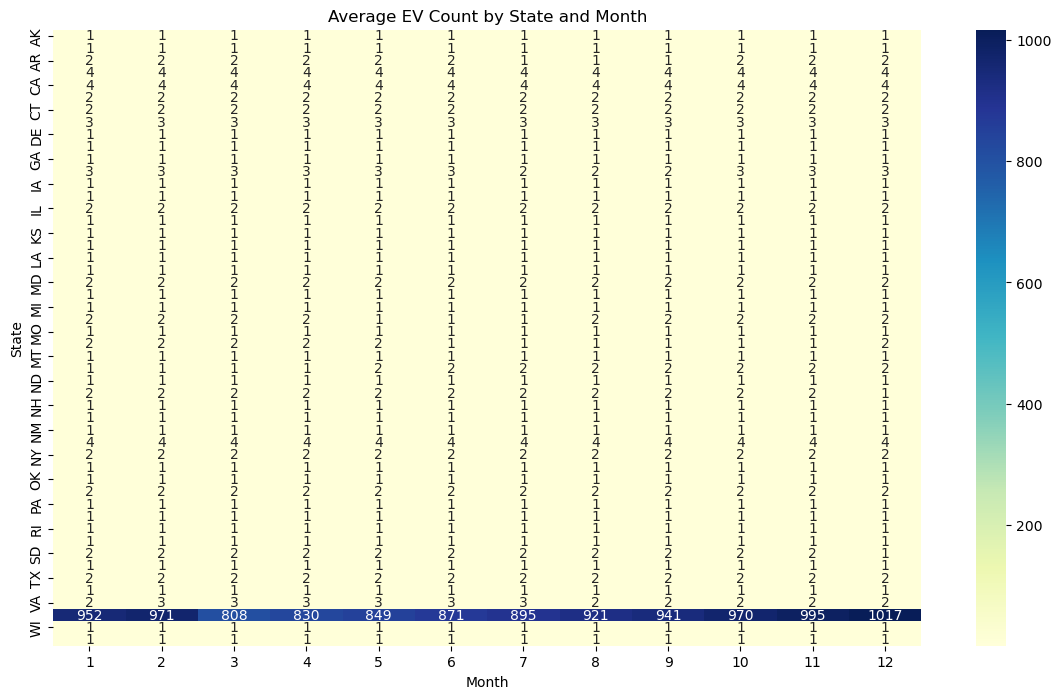

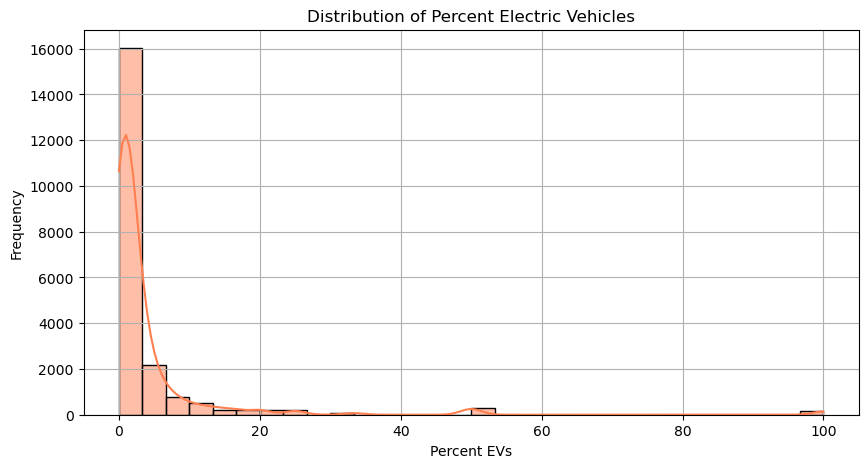

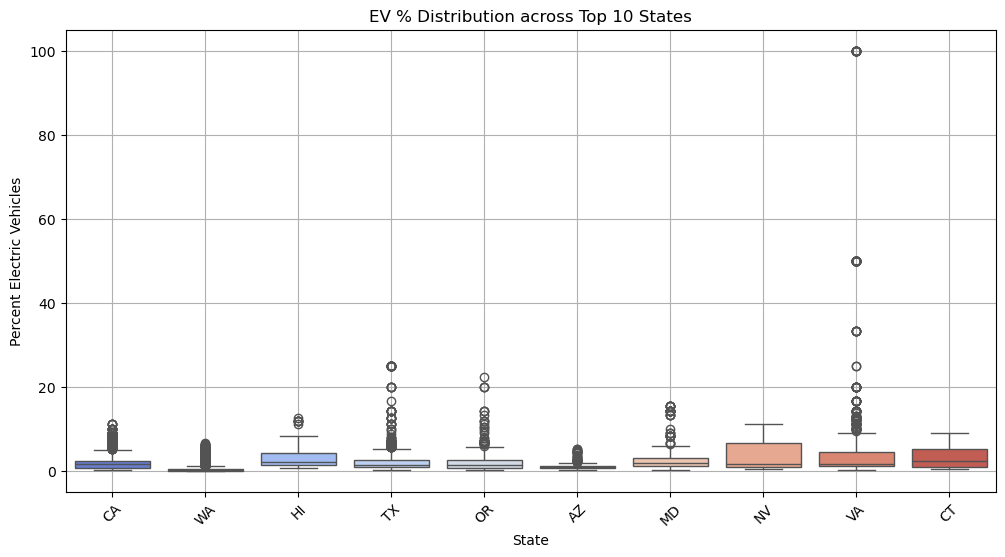

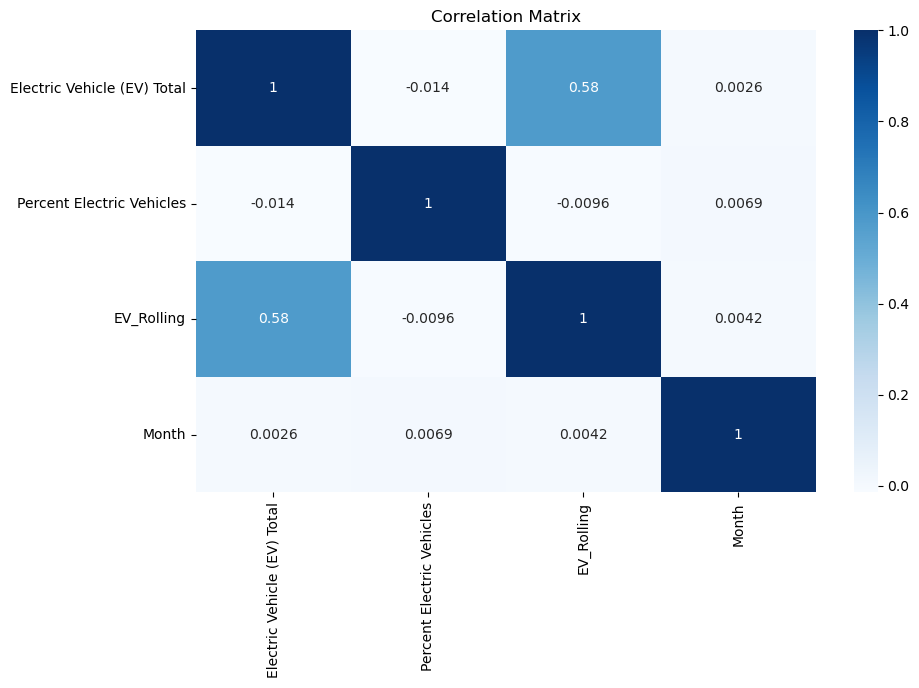

In [8]:
#Imported Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loaded Dataset
df = pd.read_csv("3ae033f50fa345051652.csv")

#Step 1: Parse Dates
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

#Step 2: Convert 'EV Total' Column to Numeric (remove commas)
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].str.replace(',', '', regex=False).astype(float)

# 🔹 Step 3: Line Plot – EV Growth Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Electric Vehicle (EV) Total'])
plt.title('EV Growth Over Time')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.grid(True)
plt.show()

#Step 4: Rolling Average Plot
df['EV_Rolling'] = df['Electric Vehicle (EV) Total'].rolling(window=3).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Electric Vehicle (EV) Total'], label='Actual')
plt.plot(df['EV_Rolling'], label='3-Point Rolling Average', color='orange')
plt.title('EV Demand with Rolling Average')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.legend()
plt.grid(True)
plt.show()

#Step 5: EV Count by Month
df['Month'] = df.index.month
df_monthly = df.groupby('Month')['Electric Vehicle (EV) Total'].mean()
plt.figure(figsize=(10,5))
df_monthly.plot(kind='bar', color='green')
plt.title('Average EV Count by Month')
plt.xlabel('Month')
plt.ylabel('Average EV Count')
plt.grid(True)
plt.show()

#Step 6: Top 10 States by Max EV Count
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_states.plot(kind='bar', color='purple')
plt.title('Top 10 States by Max EV Count')
plt.xlabel('State')
plt.ylabel('Max EV Count')
plt.grid(True)
plt.show()

#Step 7: Percent of Electric Vehicles Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Percent Electric Vehicles'], color='teal')
plt.title('Percent of Electric Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Percent EVs')
plt.grid(True)
plt.show()

#Step 8: Heatmap – EV Distribution by State & Month
# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Electric Vehicle (EV) Total', index='State', columns='Month', aggfunc='mean')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average EV Count by State and Month')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

#Step 9:Distribution Plot – % of Electric Vehicles
plt.figure(figsize=(10,5))
sns.histplot(df['Percent Electric Vehicles'], bins=30, kde=True, color='coral')
plt.title('Distribution of Percent Electric Vehicles')
plt.xlabel('Percent EVs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Step 10: Boxplot – Compare EV % across States
top_states_list = top_states.index.tolist()  # From earlier code
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['State'].isin(top_states_list)],
    x='State',
    y='Percent Electric Vehicles',
    hue='State',         
    palette='coolwarm',
    legend=False        
)
plt.title('EV % Distribution across Top 10 States')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Step 11: Correlation Matrix (if more numeric fields exist)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()
